In [287]:
import glob

import math
from math import sqrt

from bs4 import BeautifulSoup

import pandas as pd

from pandas.core.frame import DataFrame

import matplotlib.pyplot as plt

In [288]:
labels=glob.glob('E:\\dataset\\DataSet-main\\DataSet-main\\train\\labels\\*.xml')
# *是正则表达式, 表示匹配0个或多个的表达式 这里表示的是全部的xml文件。只要满足前面的条件都是匹配的。glob 是抓取路径文件

In [289]:
gt_label=["Airplane","Ship","Vehicle","Basketball Court","Tennis Court","Football field","Baseball field","Intersection","Roundabout","Bridge"]
list_nummers = []

In [290]:
def read(label):
    xmlfile=open(label,'r')
    xml = xmlfile.read()
    soup = BeautifulSoup(xml, "xml")
    return soup

In [291]:
def extract(point):
    p = point.string
    x = float(p.split(',')[0])
    y = float(p.split(',')[1])
    return (x,y)

In [292]:
def calculate(p_coordinate):
    width = sqrt(math.pow(p_coordinate[0][0]-p_coordinate[1][0],2)+(math.pow(p_coordinate[0][1]-p_coordinate[1][1],2)))
    length = sqrt(math.pow(p_coordinate[1][0]-p_coordinate[2][0],2)+(math.pow(p_coordinate[1][1]-p_coordinate[2][1],2)))
    size = width * length
    if length>=width:
        Aspect_ratio = length / width
    else:
        Aspect_ratio = width / length
    return size,Aspect_ratio

In [293]:
for label in labels:
    soup = read(label)
    list_catagory = []
    list_nummer = []
    # soup 就是xml文件中的全部信息
    object_list = soup.annotation.objects.find_all('object')
    for object in object_list:
        points = object.points.find_all('point')
        p_coordinate = []
        for point in points[:3]:
            # print(point.string)
            p_coordinate.append(extract(point))
        size,Aspect_ratio= calculate(p_coordinate)
        # 把name 变成字符串
        list_catagory.append(object.possibleresult.find('name').string)
    list_catagory.count(object.possibleresult.find('name').string)
    for gt in gt_label:
        list_nummer.append(list_catagory.count(gt))
    list_nummers.append(list_nummer)

In [294]:
data=pd.read_excel(io=r'E:\\data.xlsx')

In [295]:
a=[]
b=[]
c=[]
for i in gt_label:
    Name=[]
    Acreage=[]
    Ratio=[]
    for j in range(df.shape[1]):
        if df.iloc[[6],[j]].values[0][0] == i:
            Name.append(df.iloc[[6],[j]].values[0][0])
            Acreage.append(df.iloc[[6],[j+1]].values[0][0])
            Ratio.append(df.iloc[[6],[j+2]].values[0][0])
    a.append(Name)
    b.append(Acreage)
    c.append(Ratio)


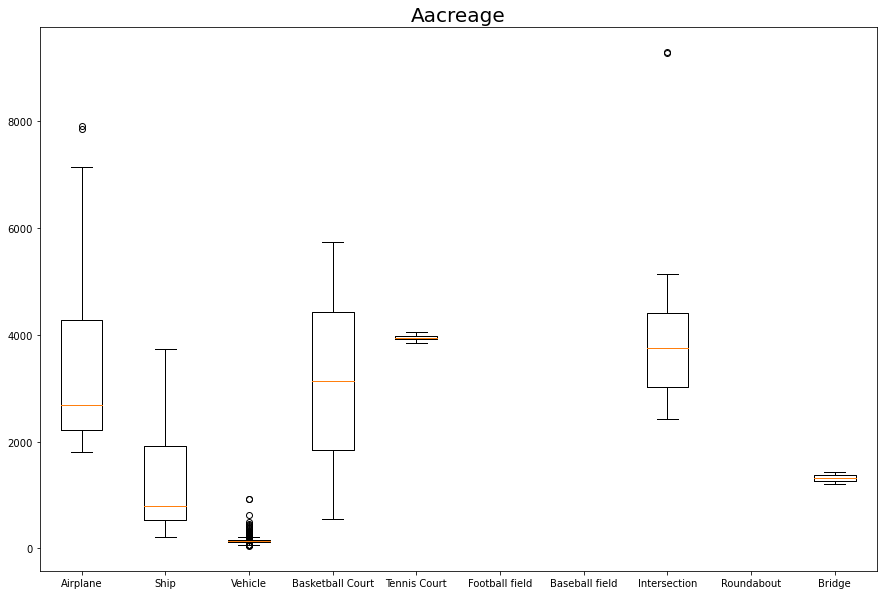

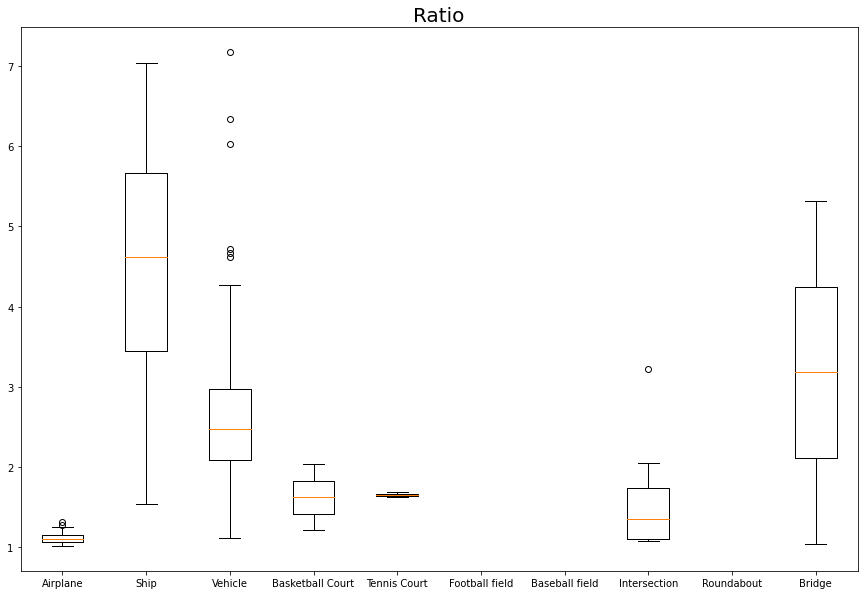

In [298]:
plt.figure(figsize=(15,10))#设置画布的尺寸
plt.title('Aacreage',fontsize=20)#标题，并设定字号大小
MyClass = 'Airplane','Ship','Vehicle','Basketball Court','Tennis Court','Football field','Baseball field','Intersection','Roundabout','Bridge'
plt.boxplot(b,labels = MyClass)#grid=False：代表不显示背景中的网格线
# data.boxplot()#画箱型图的另一种方法，参数较少，而且只接受dataframe，不常用
plt.show()#显示图像

plt.figure(figsize=(15,10))#设置画布的尺寸
plt.title('Ratio',fontsize=20)#标题，并设定字号大小
MyClass = 'Airplane','Ship','Vehicle','Basketball Court','Tennis Court','Football field','Baseball field','Intersection','Roundabout','Bridge'
plt.boxplot(c,labels = MyClass)#grid=False：代表不显示背景中的网格线
# data.boxplot()#画箱型图的另一种方法，参数较少，而且只接受dataframe，不常用
plt.show()#显示图像

In [307]:
import numpy as np

In [313]:
for label in labels:
    soup = read(label)
    result = []
    list_catagory = []
    list_nummer = []
    # soup 就是xml文件中的全部信息
    object_list = soup.annotation.objects.find_all('object')
    for object in object_list:
        points = object.points.find_all('point')
        p_coordinate = []
        for point in points[:3]:
            # print(point.string)
            p_coordinate.append(extract(point))
        size,Aspect_ratio= calculate(p_coordinate)
        # 把name 变成字符串
        list_catagory.append(object.possibleresult.find('name').string)
    list_catagory.count(object.possibleresult.find('name').string)
    for gt in gt_label:
        list_nummer.append(list_catagory.count(gt))
    list_nummers.append(list_nummer)
#     print(list_nummers)
tmp = np.array(list_nummers)
print(tmp.sum(axis=0))

[ 330  561 8564   22   88    0    0  136    0   22]


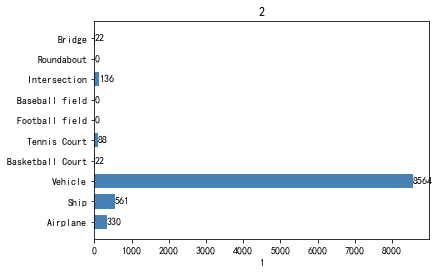

In [359]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

price = [330, 561, 8564, 22, 88, 0, 0, 136, 0, 22]
"""
绘制水平条形图方法barh
参数一：y轴
参数二：x轴
"""
plt.barh(range(10), price, height=0.7, color='steelblue', alpha=1)      # 从下往上画
plt.yticks(range(10), ['Airplane', 'Ship', 'Vehicle', 'Basketball Court', 'Tennis Court', 'Football field', 'Baseball field', 'Intersection', 'Roundabout', 'Bridge'])
plt.xlabel("1")
plt.title("2")
for x, y in enumerate(price):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.savefig("./hu.png")

In [455]:
from PIL import Image
import numpy as np

import os
import cv2

In [456]:
I = Image.open('E:\\dataset\\DataSet-main\\DataSet-main\\train\\images\\1.tif') 
I.show()

In [457]:
labels=glob.glob('E:\\dataset\\DataSet-main\\DataSet-main\\train\\labels\\*.xml')

In [458]:
origin_dir = Image.open('E:\\dataset\\DataSet-main\\DataSet-main\\train\\images\\7.tif')
annota_dir = 'E:\\dataset\\DataSet-main\\DataSet-main\\train\\labels\\7.xml'
print(origin_dir)

<PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=800x600 at 0x20FA2C77FA0>


In [459]:
def extract(point):
    p = point.string
    x = float(p.split(',')[0])
    y = float(p.split(',')[1])
    return (y,x)

In [460]:
soup = read(label)
object_list = soup.annotation.objects.find_all('object')
for object in object_list:
    points = object.points.find_all('point')
    p_coordinate = []
    for point in points:
        # print(point.string)
        p_coordinate.append(extract(point))
    print(p_coordinate)

[(553.0, 597.0), (576.0, 562.0), (531.0, 533.0), (508.0, 568.0), (553.0, 597.0)]


In [461]:
from PIL import Image, ImageDraw,ImageFont

In [462]:
draw = ImageDraw.Draw(origin_dir)
for i in range(2):
    p_coordinate[i]
    p_coordinate[i+1]
    print(p_coordinate[i])
    draw.line((*p_coordinate[i],*p_coordinate[i+1]), 'cyan')
origin_dir.show()

(553.0, 597.0)
(576.0, 562.0)
